In [5]:
#My path
path = '/Users/claes/Documents/Mine dokumenter/Universitet/7.semester/Deep_learning/Final project/data/dataset/Revco/'

#Your path
#path = '/Users/claes/Desktop/Deep_learning/Week_6'

In [2]:
import pandas as pd

# Read the Parquet file into a DataFrame
df_temp = pd.read_parquet(path + '806016_temp.parquet')

# Display the first few rows
#print(df_temp.head(5))

In [3]:
# Read the Parquet file into a DataFrame
df_events = pd.read_parquet(path + '806016_events.parquet')

# Display the first few rows
#df_events.head(20)

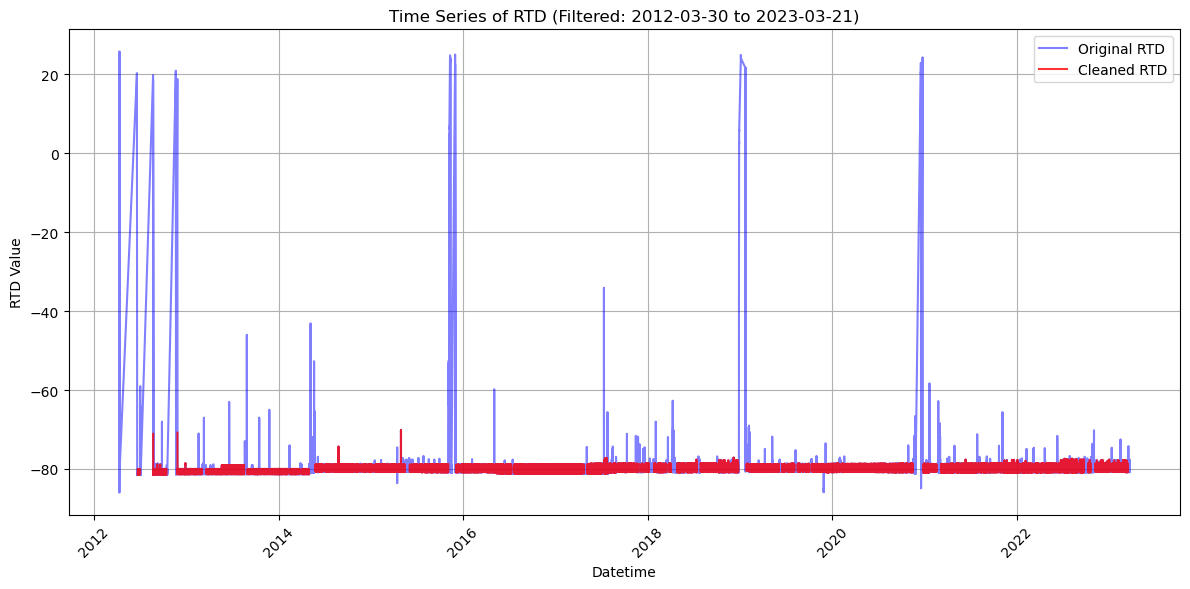

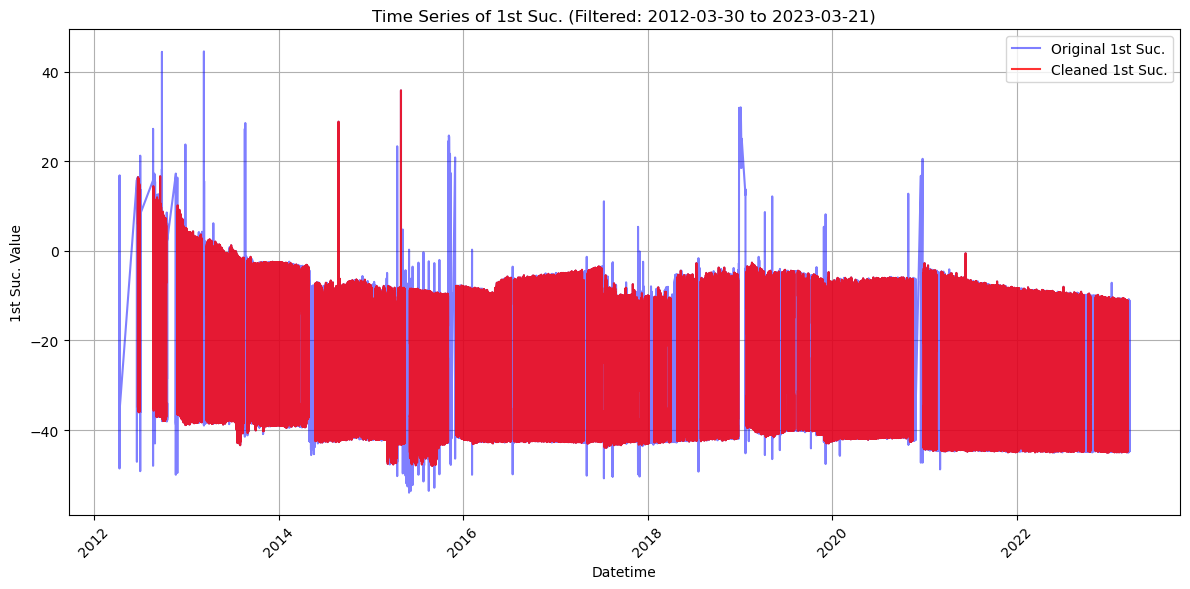

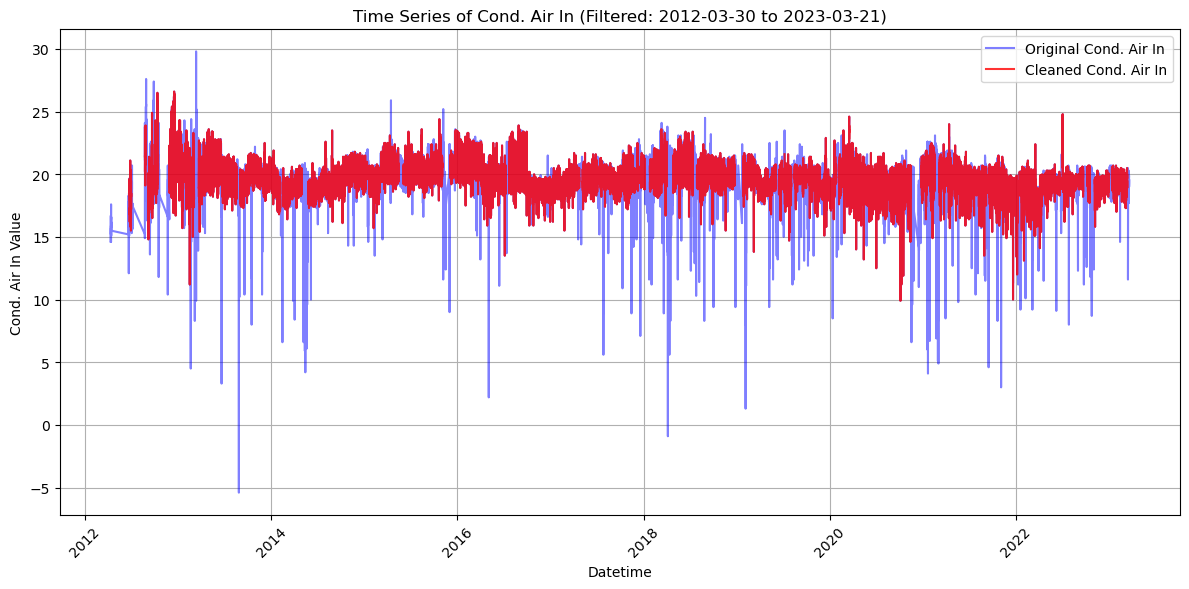

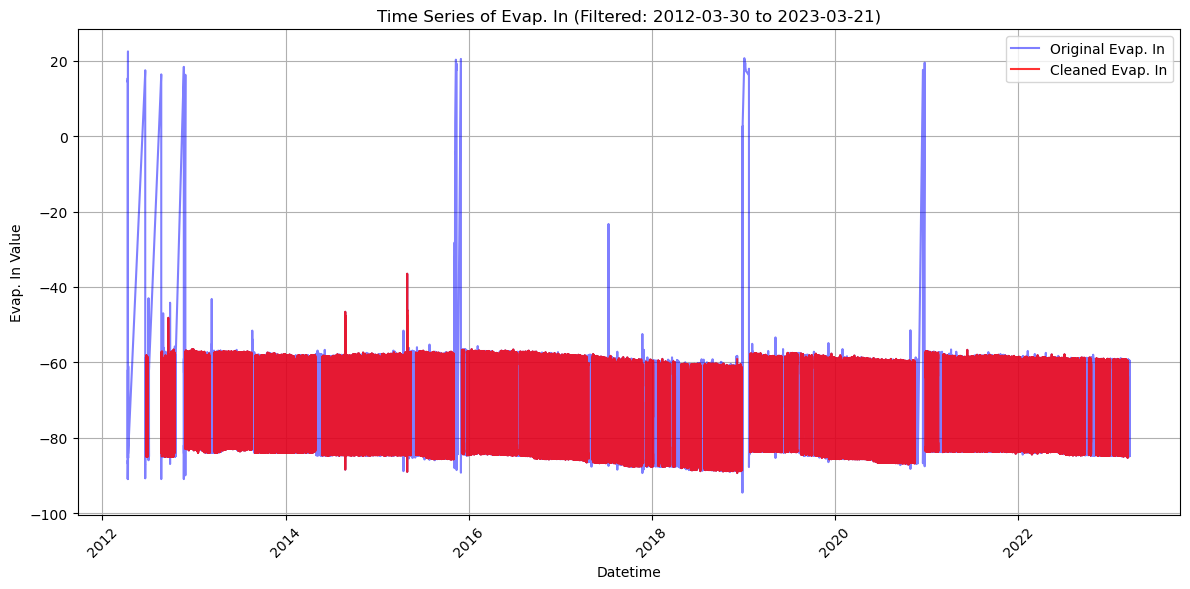

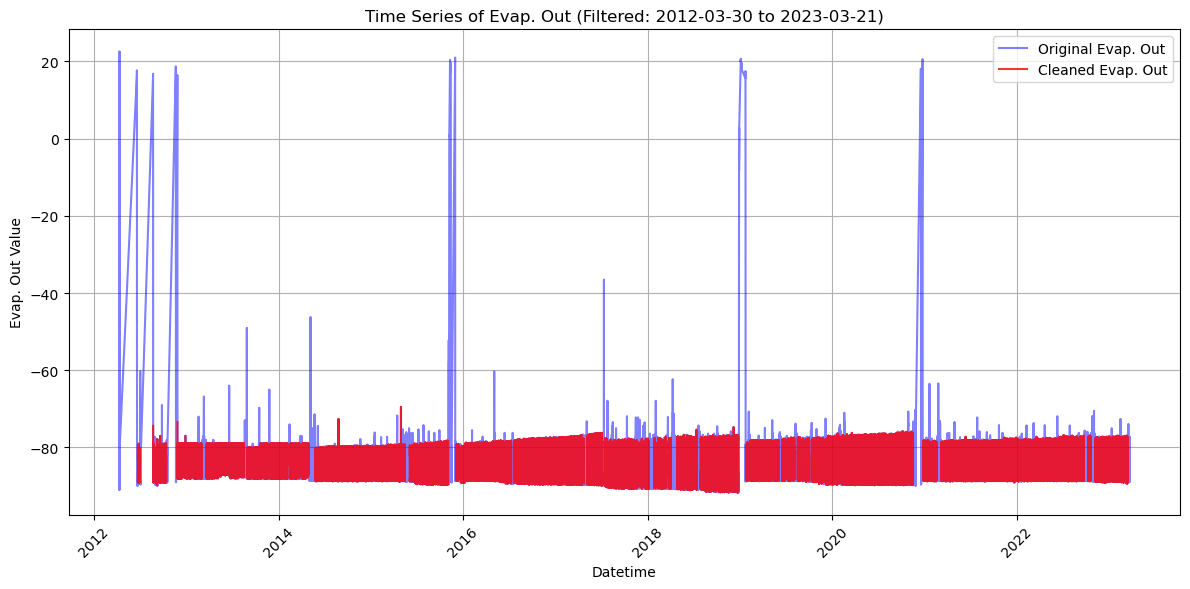

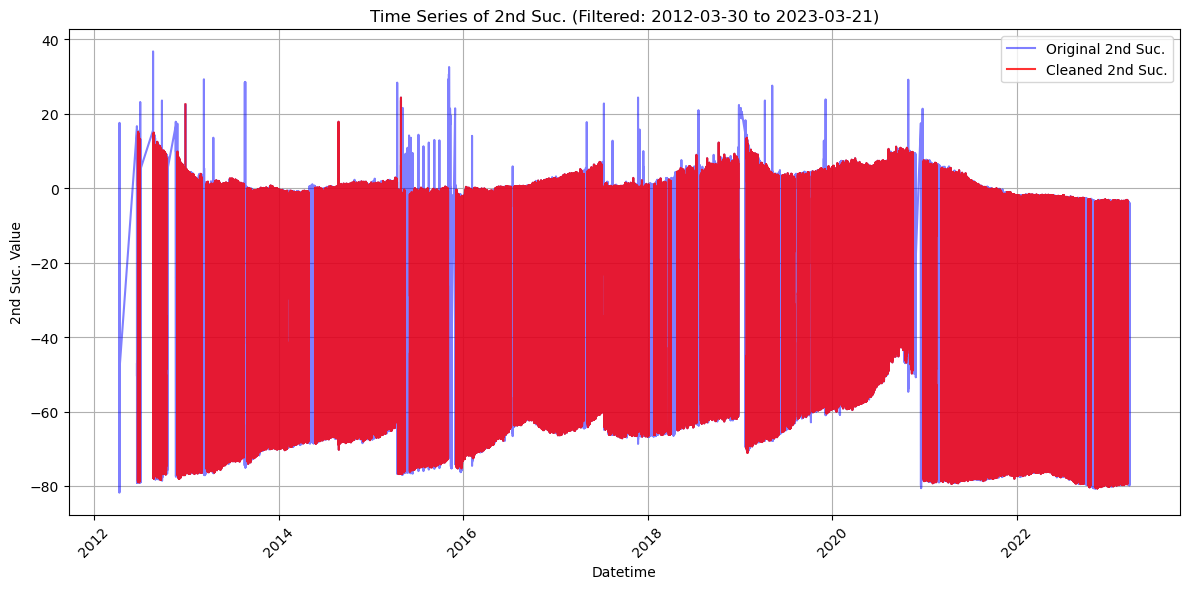

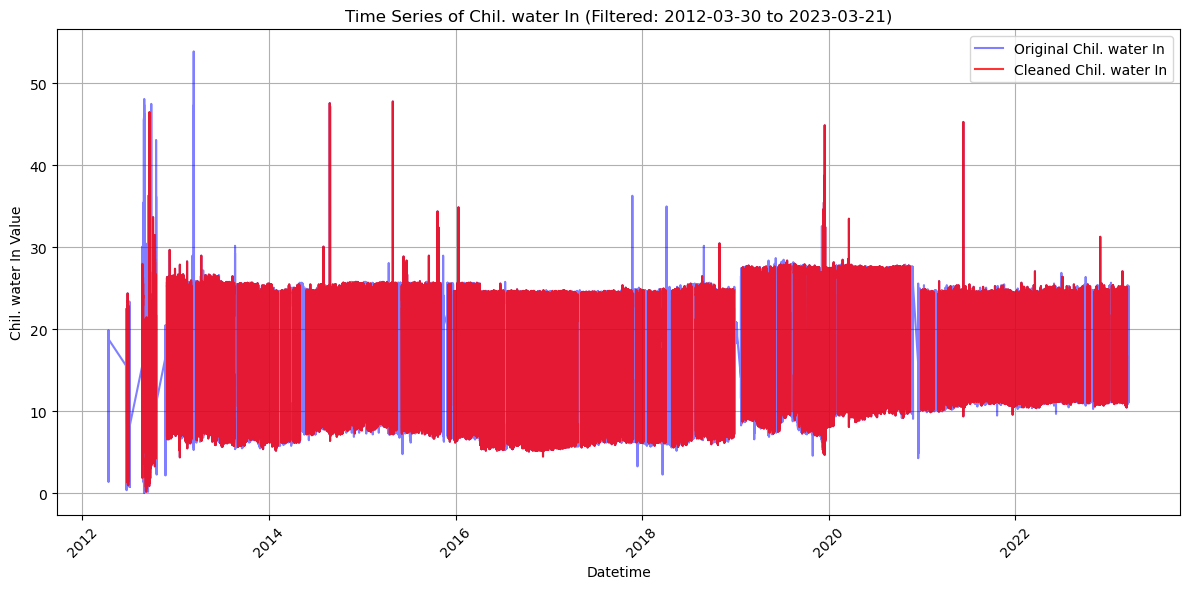

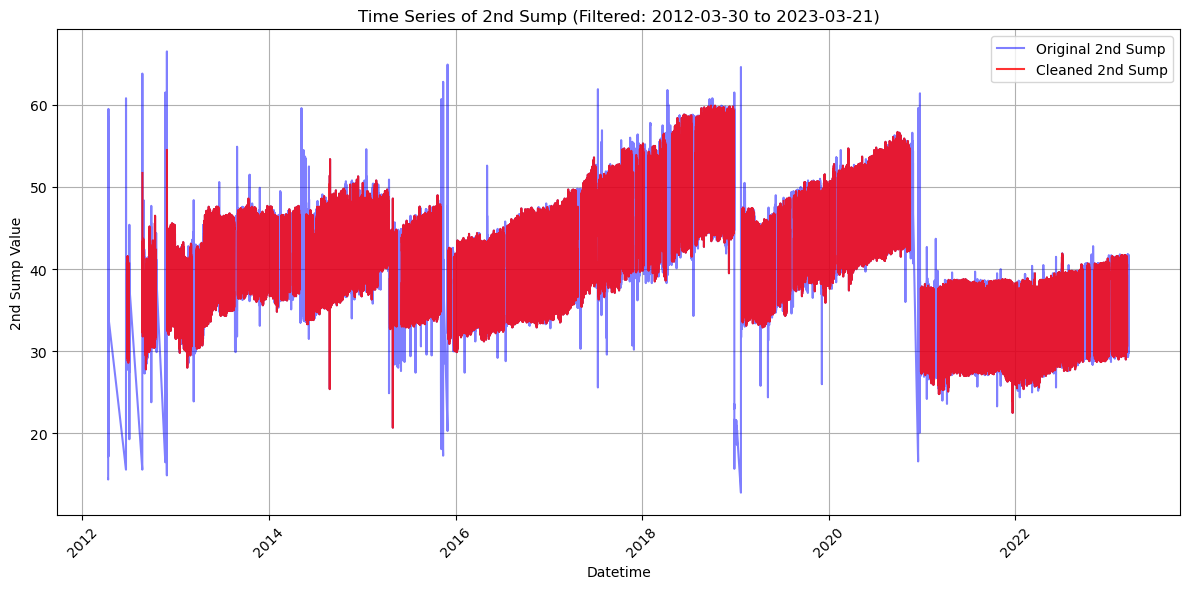

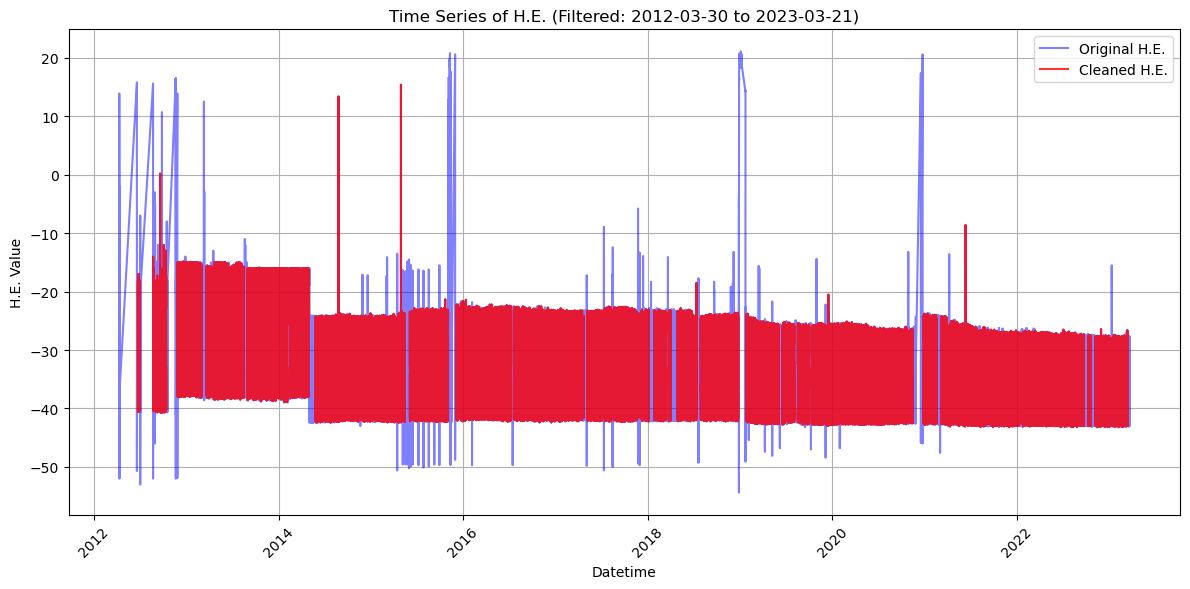

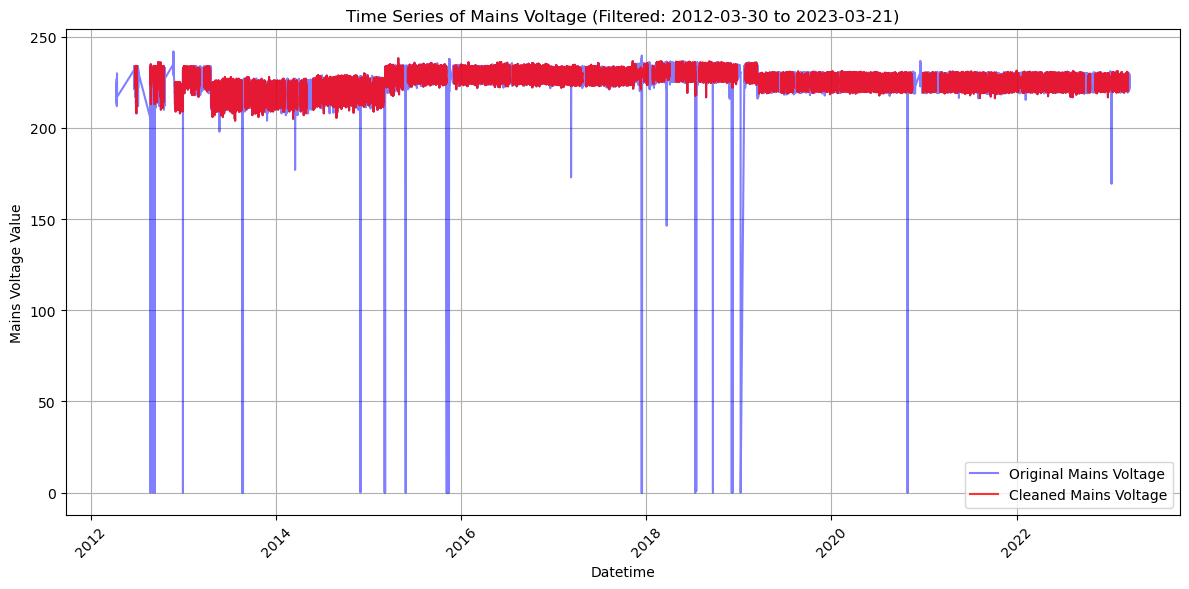

In [20]:
import pandas as pd

Freezer_number = 806024

# Parameters
days_before_event = 3
days_after_event = 3

RTD_higher_than = -70
voltage_lower_than = 200

remove_from_date = '2020-03-01'
remove_until_date = '2020-08-01'

# Load your Parquet file
df = pd.read_parquet(path + str(Freezer_number) + '_temp.parquet')

# Ensure 'Datetime' is in datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# **Step 1**: Filter out rows based on `RTD` and `Mains Voltage`
df = df[(df['RTD'] <= RTD_higher_than) & (df['Mains Voltage'] >= voltage_lower_than)]

# **Step 2**: Remove rows between dates
#df = df[~((df['Datetime'] >= remove_from_date) & (df['Datetime'] <= remove_until_date))]

# **Step 3**: Identify the indices where an event has occurred
event_indices = df[df['Event'].notnull()].index

# Create sets to store indices for rows to collect and keep
indices_to_collect = set()
for idx in event_indices:
    # Get the event timestamp
    event_time = df.loc[idx, 'Datetime']
    
    # Define the time window around the event
    start_time = event_time - pd.Timedelta(days=days_before_event)
    end_time = event_time + pd.Timedelta(days=days_after_event)
    
    # Select rows within the time window
    mask = (df['Datetime'] >= start_time) & (df['Datetime'] <= end_time)
    indices_to_collect.update(df[mask].index)

# Convert to list and sort indices (just for clarity)
indices_to_collect = sorted(indices_to_collect)

# **Step 4**: Extract rows to collect into a separate DataFrame
df_around_events = df.loc[indices_to_collect]

# **Step 5**: Drop these rows from the original DataFrame to get the cleaned data
df_cleaned = df.drop(indices_to_collect)

# **Step 6**: Save both DataFrames
df_around_events.to_parquet(path + 'around_events_data_' + str(Freezer_number) + '.parquet', index=False)
df_cleaned.to_parquet(path + 'cleaned_data_' + str(Freezer_number) + '.parquet', index=False)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
start_date = '2012-03-30'
end_date = '2023-03-21'

# Read the original and cleaned Parquet files into DataFrames
df_original = pd.read_parquet(path + str(Freezer_number) + '_temp.parquet')
df_cleaned = pd.read_parquet(path + 'cleaned_data_' + str(Freezer_number) + '.parquet')

# Convert 'Datetime' to datetime type if not already done
df_original['Datetime'] = pd.to_datetime(df_original['Datetime'])
df_cleaned['Datetime'] = pd.to_datetime(df_cleaned['Datetime'])

# Set 'Datetime' as the index for easier plotting
df_original.set_index('Datetime', inplace=True)
df_cleaned.set_index('Datetime', inplace=True)

# Filter both DataFrames to the specified date range
df_original_filtered = df_original.loc[start_date:end_date]
df_cleaned_filtered = df_cleaned.loc[start_date:end_date]

# Select only numeric columns for plotting (assuming both DataFrames have the same structure)
numeric_columns = df_cleaned_filtered.select_dtypes(include=['float64', 'int64']).columns

# Calculate time differences for the cleaned data to detect gaps
time_diffs = df_cleaned_filtered.index.to_series().diff().dt.total_seconds()

# Define a threshold (e.g., 2x the median difference) to detect large gaps
gap_threshold = 2 * time_diffs.median()

# Insert NaNs where gaps are detected in the cleaned data
df_cleaned_filtered.loc[time_diffs > gap_threshold, numeric_columns] = np.nan

# Plot each numeric column, overlaying cleaned data (red) on original data (blue)
for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    
    # Plot original data in blue
    plt.plot(df_original_filtered.index, df_original_filtered[col], label=f'Original {col}', color='blue', alpha=0.5)
    
    # Plot cleaned data in red
    plt.plot(df_cleaned_filtered.index, df_cleaned_filtered[col], label=f'Cleaned {col}', color='red', alpha=0.8)
    
    # Customize plot appearance
    plt.title(f"Time Series of {col} (Filtered: {start_date} to {end_date})")
    plt.xlabel("Datetime")
    plt.ylabel(f"{col} Value")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()

In [15]:
df = pd.read_parquet(path + str(Freezer_number) + '_temp.parquet')

# Calculate the number of rows in each DataFrame
total_rows = len(df)
rows_around_events = len(df_around_events)
rows_cleaned = len(df_cleaned)

# Calculate the percentage of rows moved to df_around_events
percentage_removed = (rows_around_events / total_rows) * 100

# Print the results
print(f"Total rows in original DataFrame: {total_rows:,}")
print(f"Rows in df_around_events: {rows_around_events:,}")
print(f"Rows in df_cleaned: {rows_cleaned:,}")
print(f"Percentage of rows removed to df_around_events: {percentage_removed:.2f}%")

Total rows in original DataFrame: 5,474,564
Rows in df_around_events: 2,022,970
Rows in df_cleaned: 3,437,254
Percentage of rows removed to df_around_events: 36.95%


### Vis data around_events_data

In [16]:
# Read the Parquet file into a DataFrame
df_temp = pd.read_parquet('around_events_data_' + str(Freezer_number) + '.parquet')

pd.set_option('display.max_rows', None)

# Display the first few rows
#df_temp.head(10000)

FileNotFoundError: [Errno 2] No such file or directory: 'around_events_data_806019.parquet'

### Vis data kun rækker med event

In [ ]:
df = pd.read_parquet(path + '806016_temp.parquet')

pd.set_option('display.max_rows', None)

df_filtered = df[df['Event'].notnull()]
#df_filtered.head(500)
#print(df_filtered.head(5))

### Antal events pr type

In [ ]:
import pandas as pd

# Ensure the 'Event' column is not null
df_events = df[df['Event'].notnull()]

# If the 'Event' column contains byte strings, decode them
df_events['Event'] = df_events['Event'].apply(
    lambda x: x.decode('utf-8') if isinstance(x, bytes) else x
)

# Count the occurrences of each unique event
event_counts = df_events['Event'].value_counts()

# Display the counts
print(event_counts)

Event
["Door is opened"]                                                                                                   441
["Warm Alarm has been RTD = -70C"]                                                                                    60
["Display Power On"]                                                                                                  48
["Warm Alarm RTD = -69C"]                                                                                             40
["Shutdown"]                                                                                                          37
["AC Power Interrupted"]                                                                                              27
["Door is opened","Door closed after  min= 0 sec= 12"]                                                                26
["AC Power Restored"]                                                                                                 24
["AC Power Interrupted","A

C:\Users\claes\AppData\Local\Temp\ipykernel_5208\3757052721.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events['Event'] = df_events['Event'].apply(


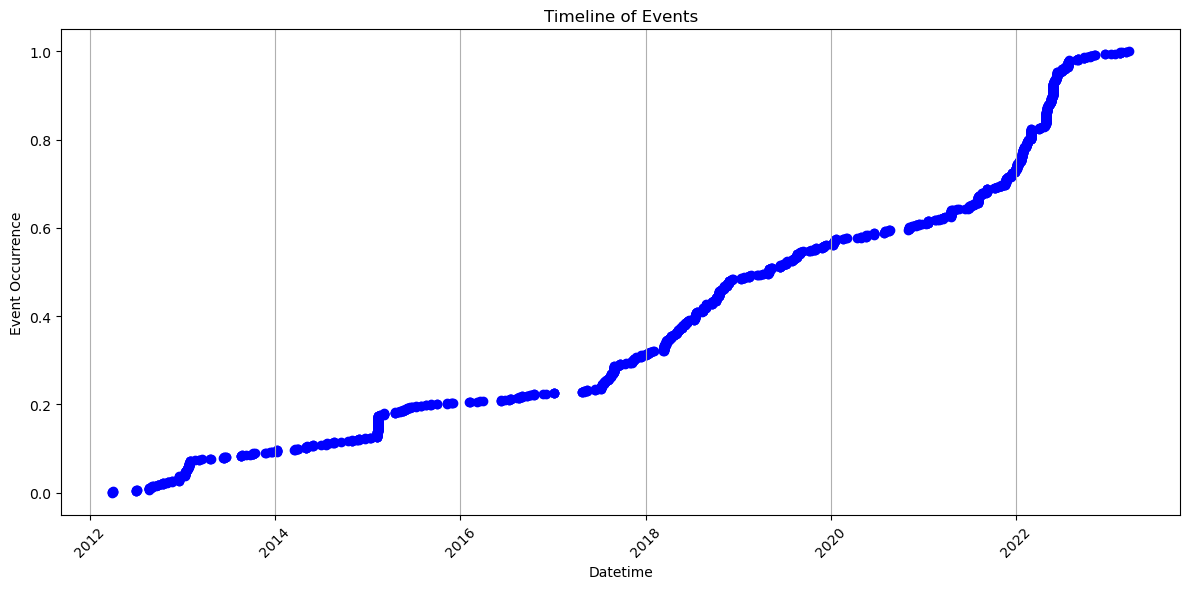

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure the 'Datetime' column is in datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Filter rows where 'Event' is not 'None'
df_events = df[df['Event'].notnull()]

# Sort the DataFrame by 'Datetime'
df_events = df_events.sort_values(by='Datetime')

# Create a y-axis position for each event to spread them out
# We'll alternate the y-axis position to avoid overlap
num_events = len(df_events)
y_positions = np.linspace(0, 1, num_events)  # Spread y-values slightly above and below 1

plt.figure(figsize=(12, 6))
plt.scatter(df_events['Datetime'], y_positions, marker='o', color='blue')

# # Add event descriptions as annotations with offsets
# for i, (idx, row) in enumerate(df_events.iterrows()):
#     plt.annotate(
#         row['Event'].decode('utf-8') if isinstance(row['Event'], bytes) else row['Event'],
#         (row['Datetime'], y_positions[i]),
#         textcoords="offset points",
#         xytext=(0, 10),
#         ha='center',
#         fontsize=9,
#         arrowprops=dict(arrowstyle='->', color='gray', lw=0.5)
#     )

# Formatting the plot
plt.title('Timeline of Events')
plt.xlabel('Datetime')
plt.ylabel('Event Occurrence')
plt.grid(axis='x')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Renset data oven på original data

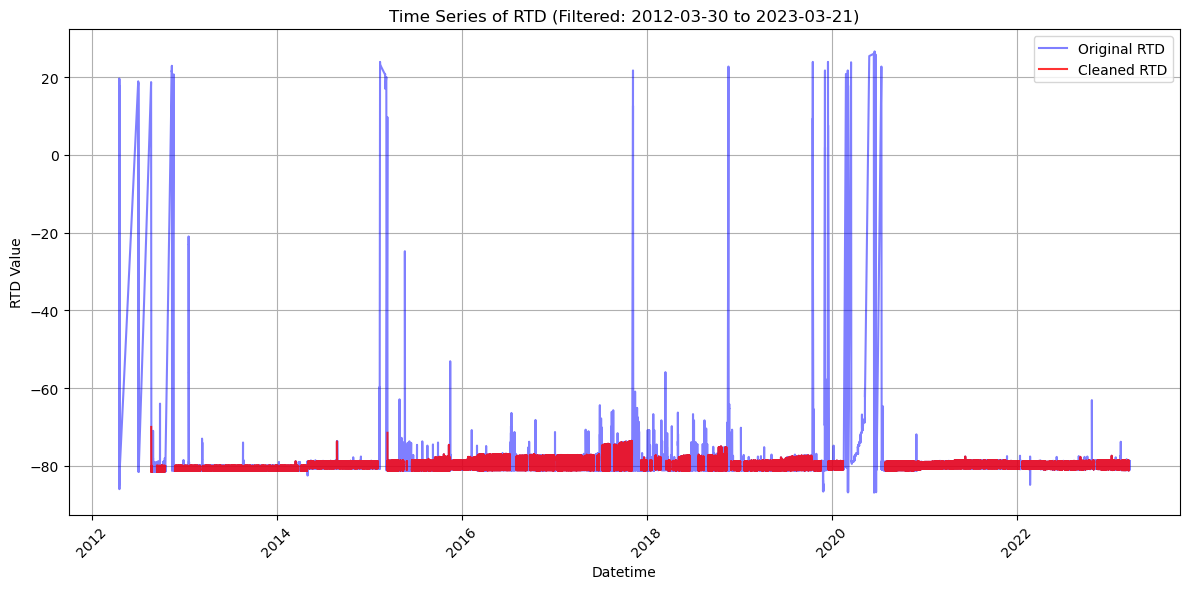

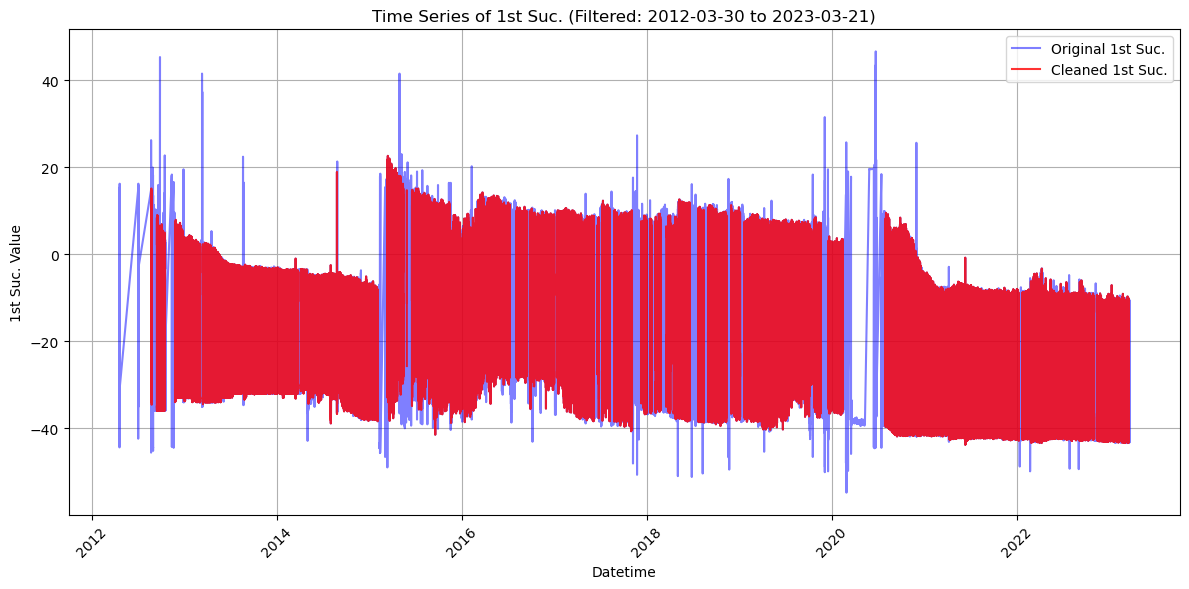

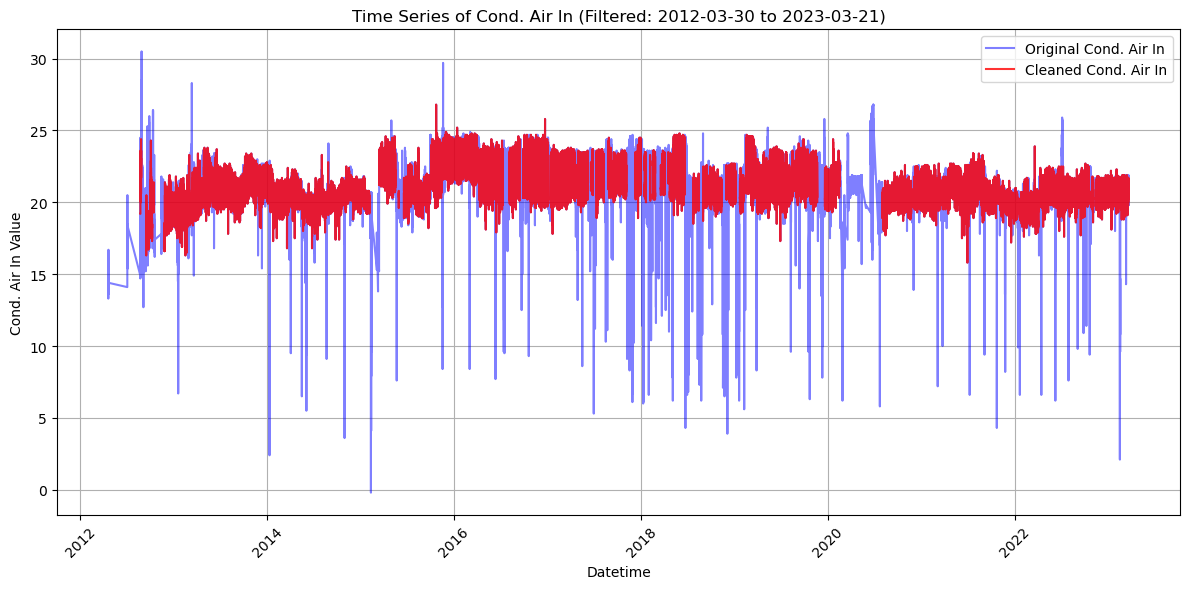

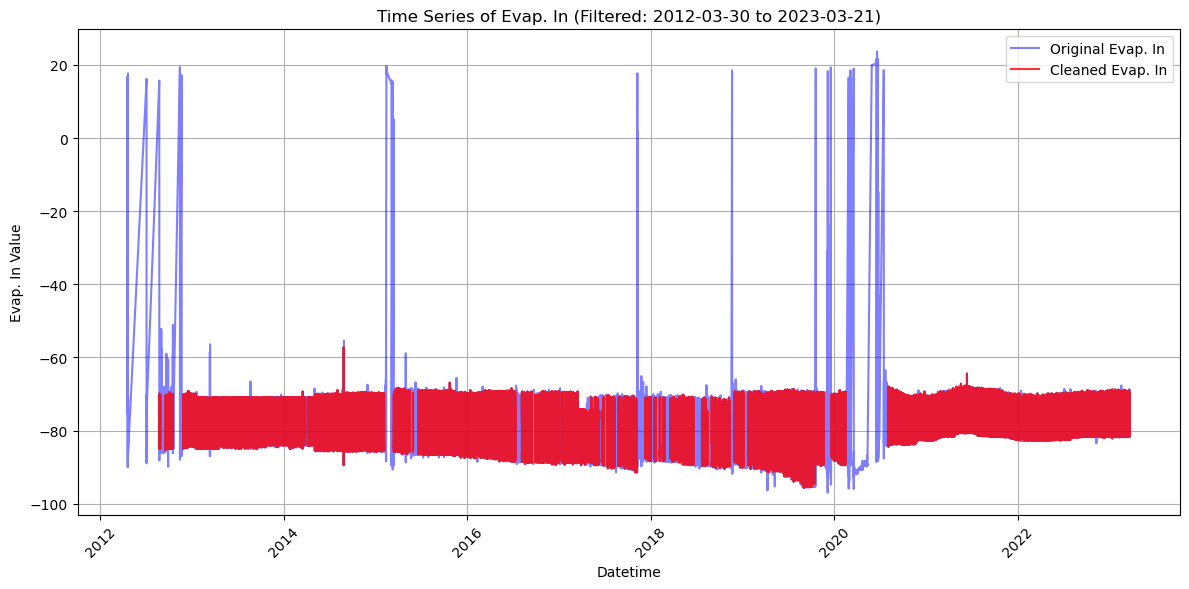

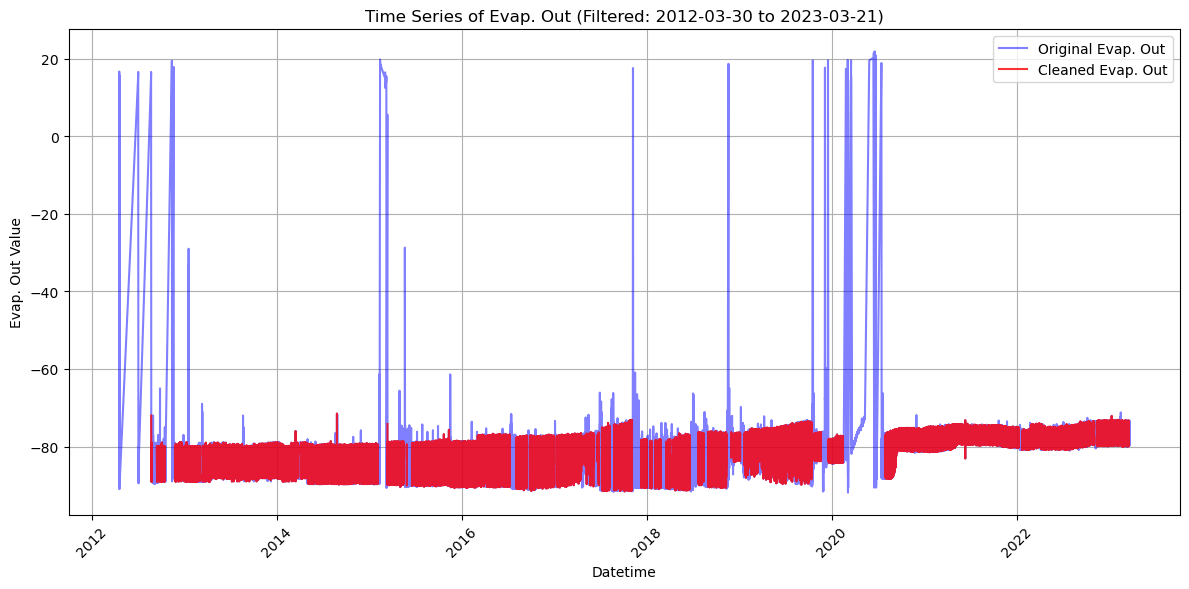

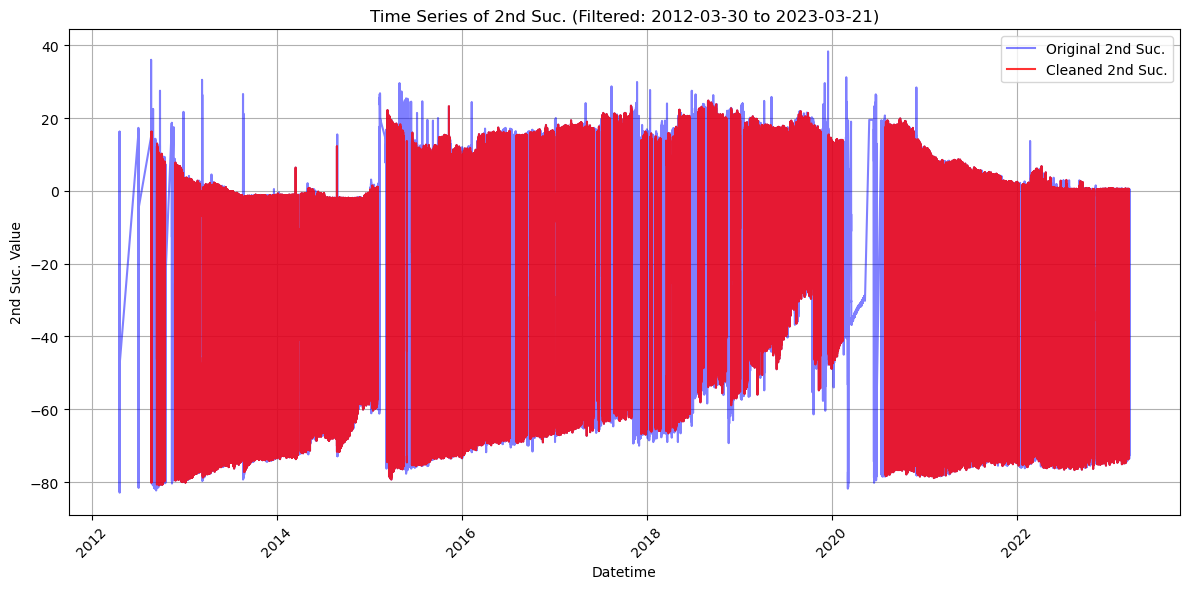

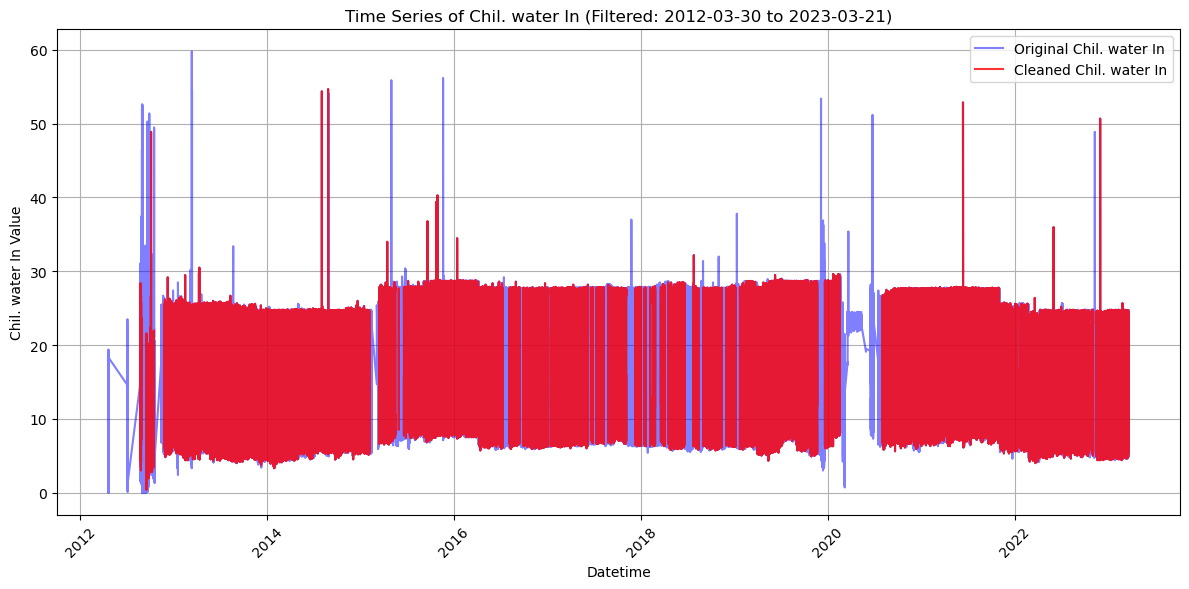

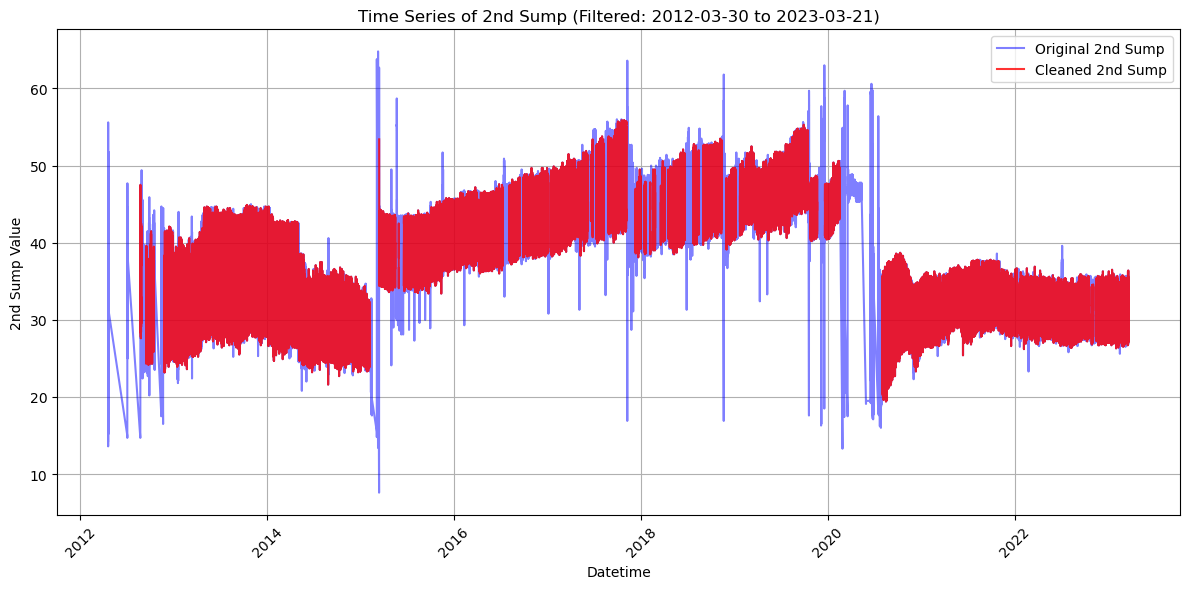

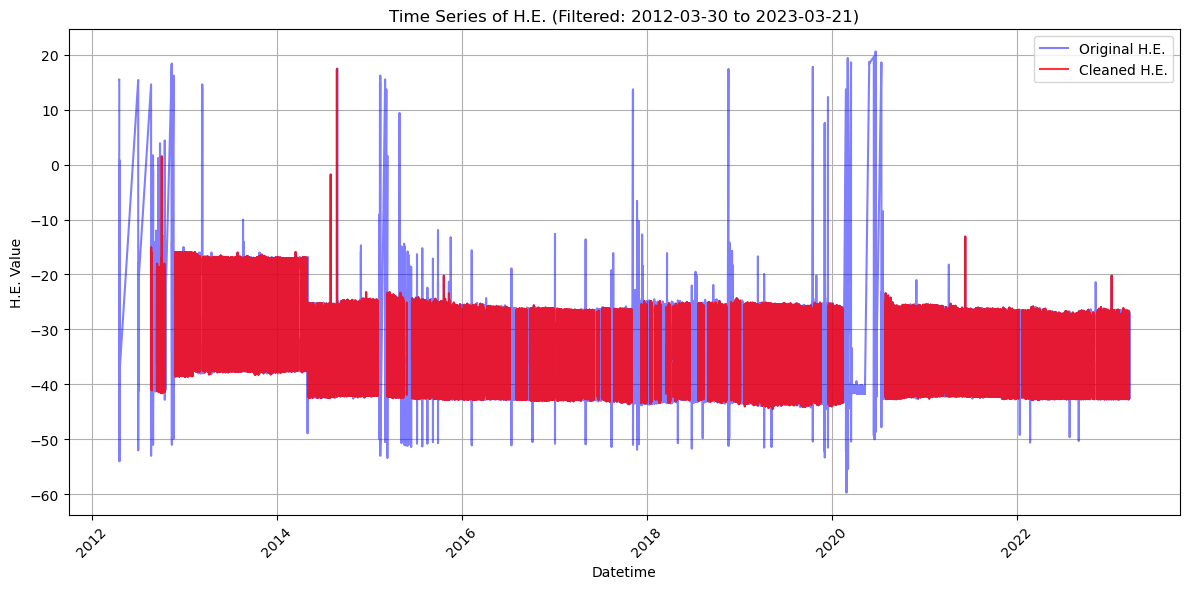

c:\Users\claes\anaconda3\envs\ML\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


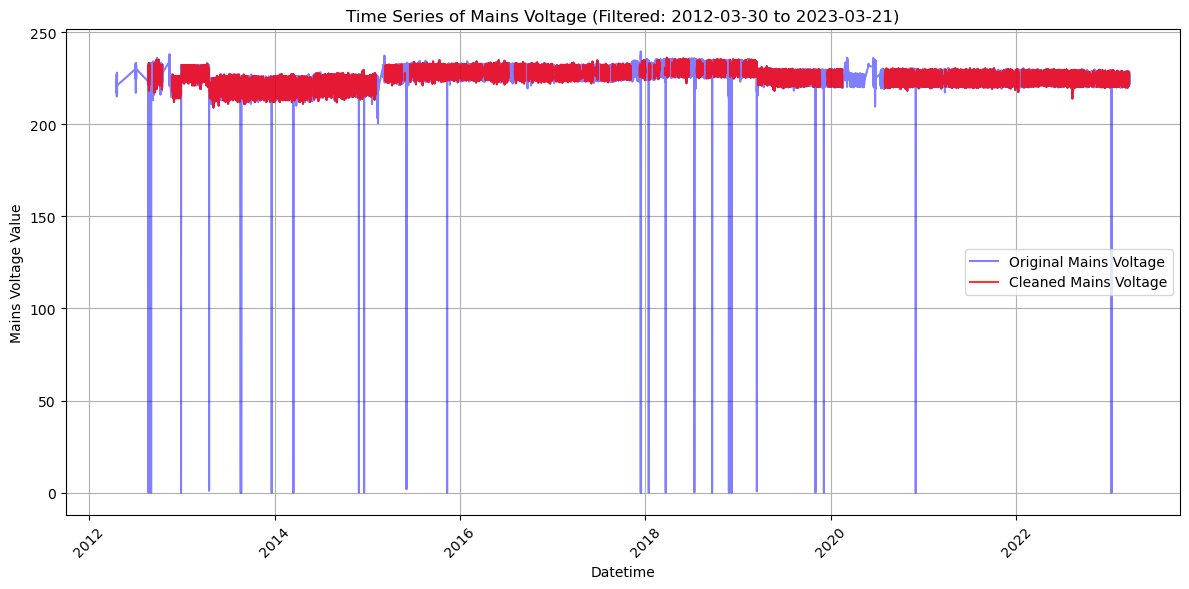

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
start_date = '2012-03-30'
end_date = '2023-03-21'

# Read the original and cleaned Parquet files into DataFrames
df_original = pd.read_parquet(path + str(Freezer_number) + '_temp.parquet')
df_cleaned = pd.read_parquet(path + 'cleaned_data_' + str(Freezer_number) + '.parquet')

# Convert 'Datetime' to datetime type if not already done
df_original['Datetime'] = pd.to_datetime(df_original['Datetime'])
df_cleaned['Datetime'] = pd.to_datetime(df_cleaned['Datetime'])

# Set 'Datetime' as the index for easier plotting
df_original.set_index('Datetime', inplace=True)
df_cleaned.set_index('Datetime', inplace=True)

# Filter both DataFrames to the specified date range
df_original_filtered = df_original.loc[start_date:end_date]
df_cleaned_filtered = df_cleaned.loc[start_date:end_date]

# Select only numeric columns for plotting (assuming both DataFrames have the same structure)
numeric_columns = df_cleaned_filtered.select_dtypes(include=['float64', 'int64']).columns

# Calculate time differences for the cleaned data to detect gaps
time_diffs = df_cleaned_filtered.index.to_series().diff().dt.total_seconds()

# Define a threshold (e.g., 2x the median difference) to detect large gaps
gap_threshold = 2 * time_diffs.median()

# Insert NaNs where gaps are detected in the cleaned data
df_cleaned_filtered.loc[time_diffs > gap_threshold, numeric_columns] = np.nan

# Plot each numeric column, overlaying cleaned data (red) on original data (blue)
for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    
    # Plot original data in blue
    plt.plot(df_original_filtered.index, df_original_filtered[col], label=f'Original {col}', color='blue', alpha=0.5)
    
    # Plot cleaned data in red
    plt.plot(df_cleaned_filtered.index, df_cleaned_filtered[col], label=f'Cleaned {col}', color='red', alpha=0.8)
    
    # Customize plot appearance
    plt.title(f"Time Series of {col} (Filtered: {start_date} to {end_date})")
    plt.xlabel("Datetime")
    plt.ylabel(f"{col} Value")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()

## Ren data

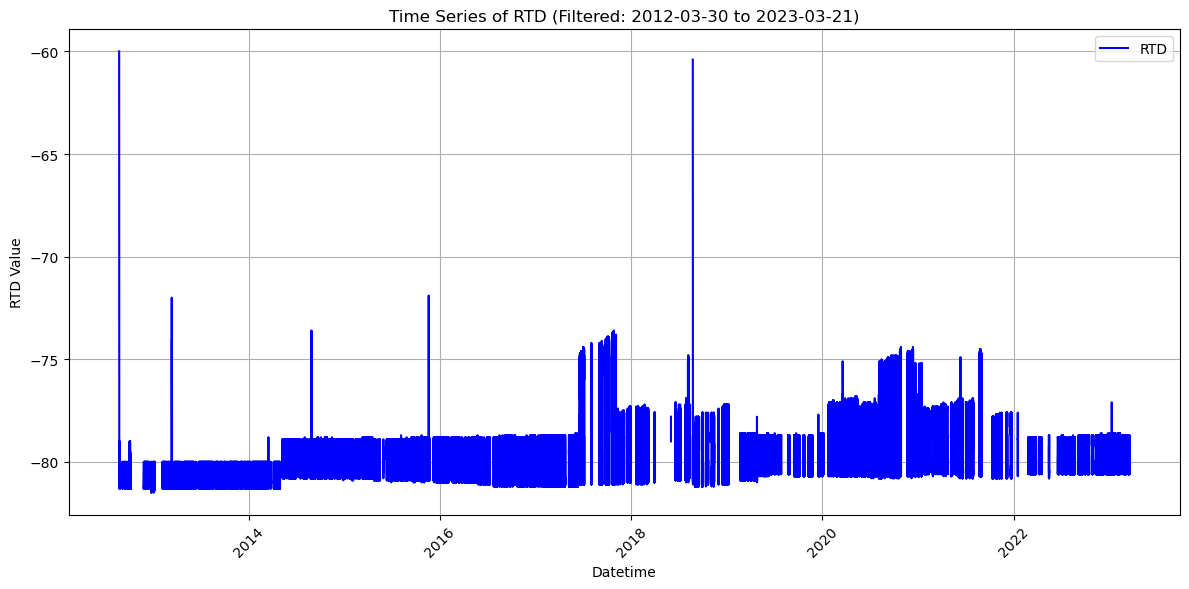

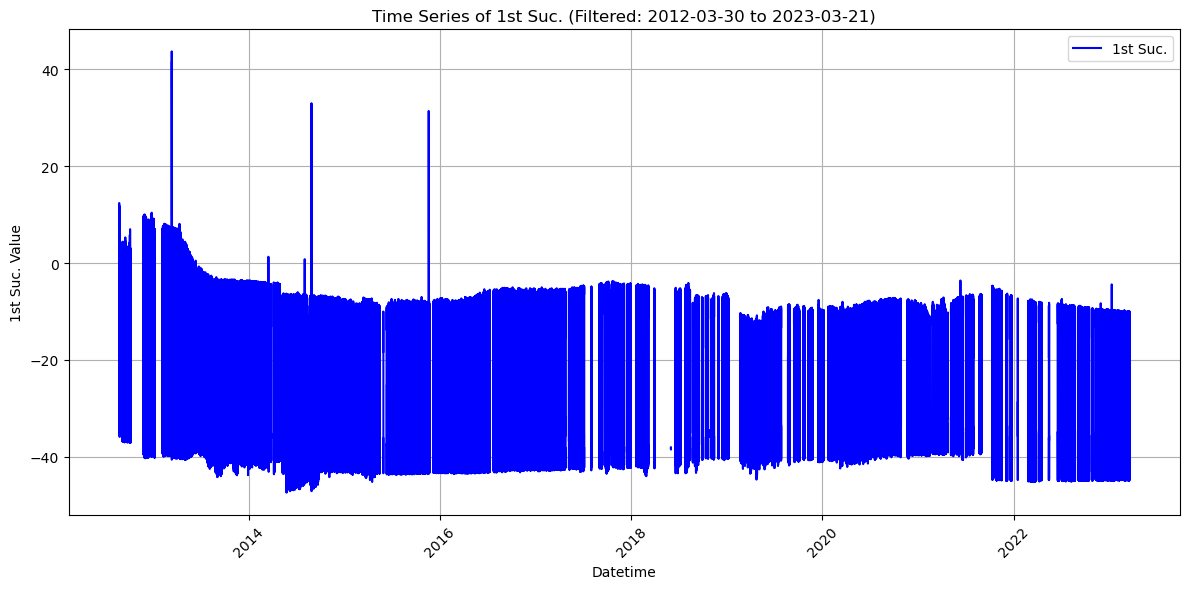

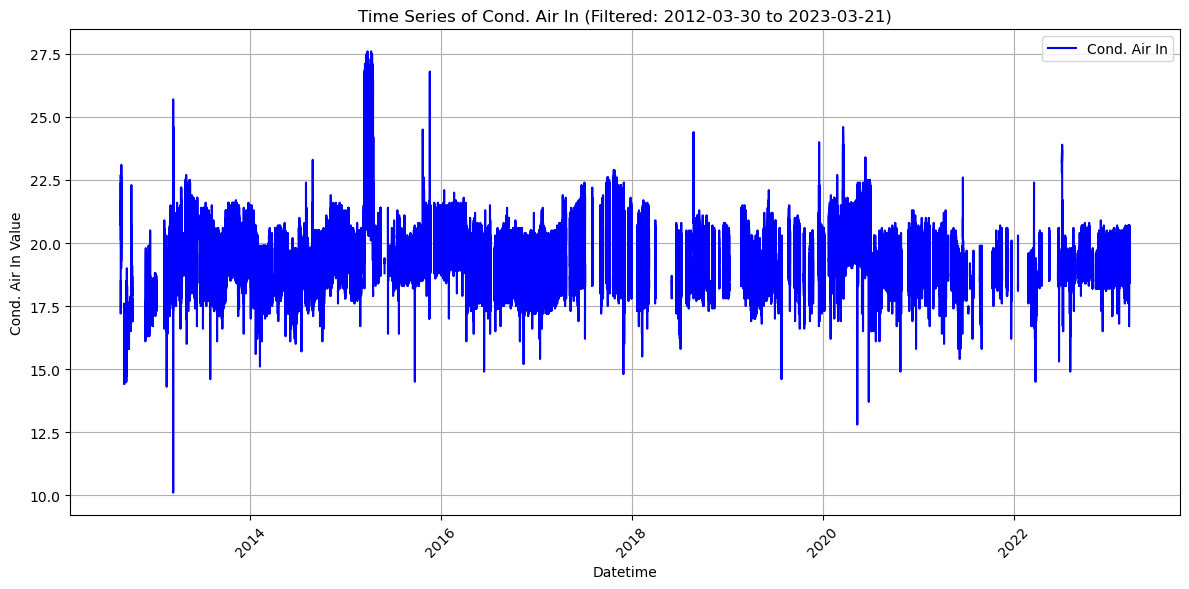

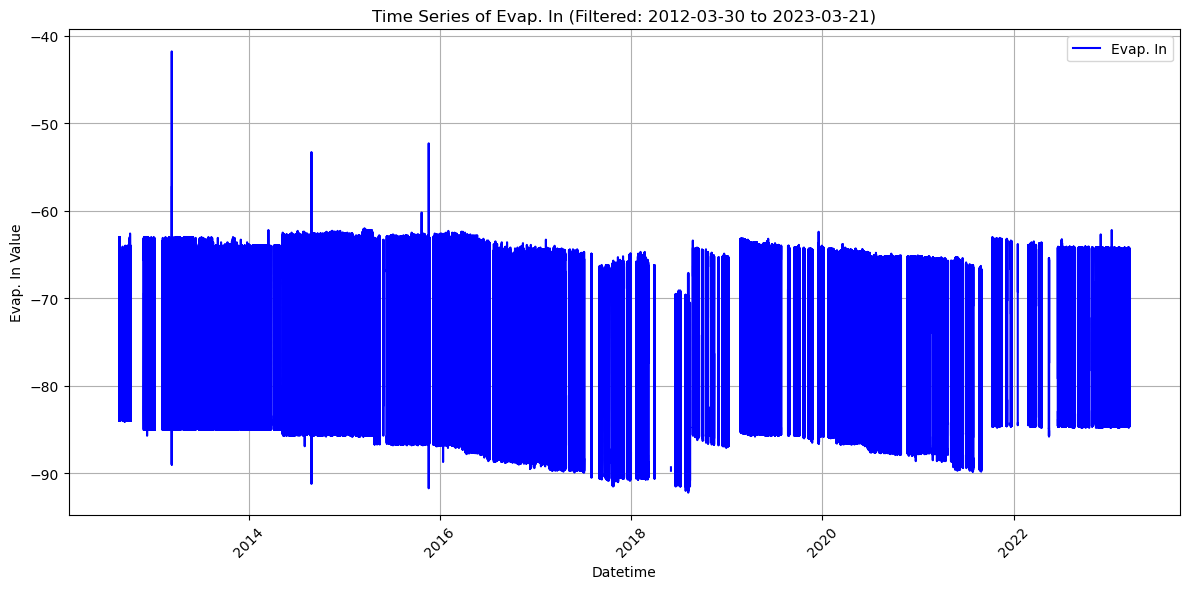

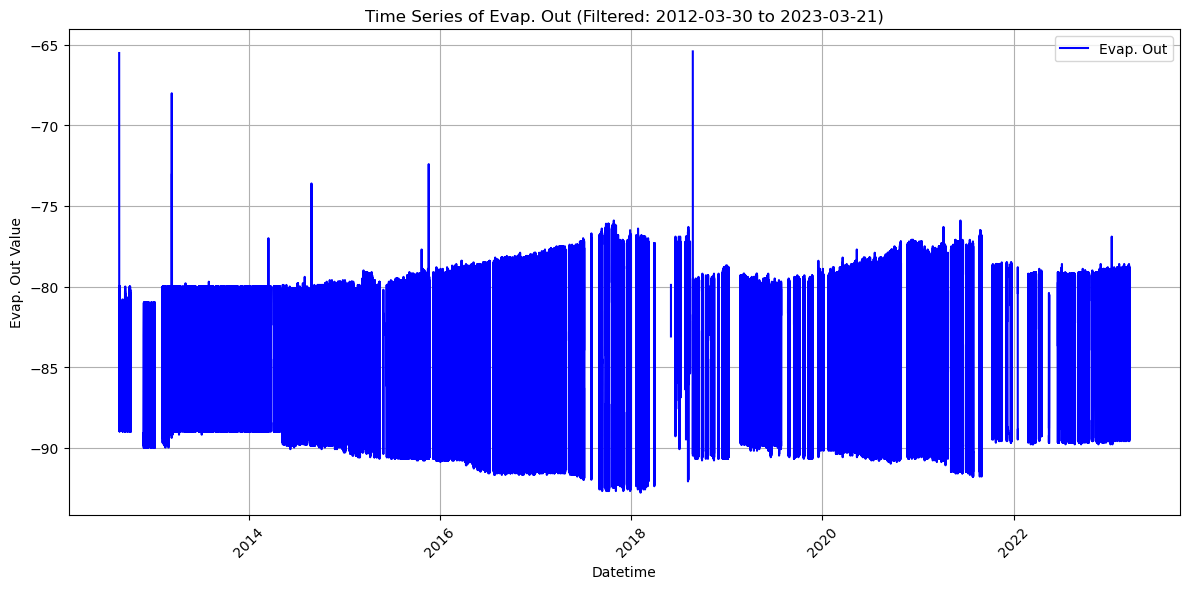

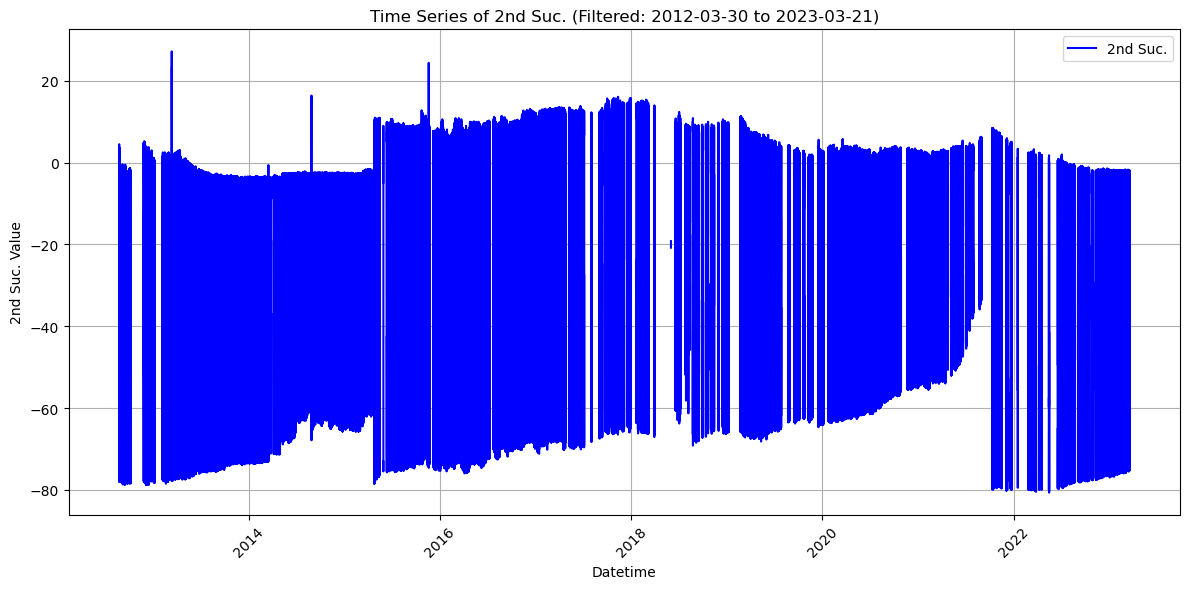

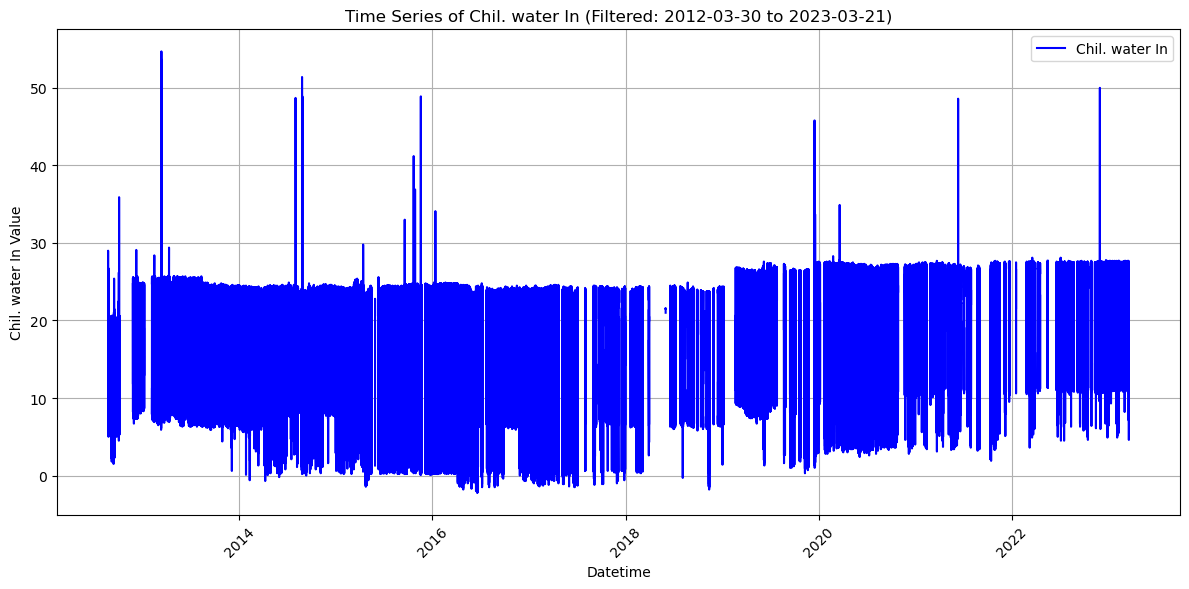

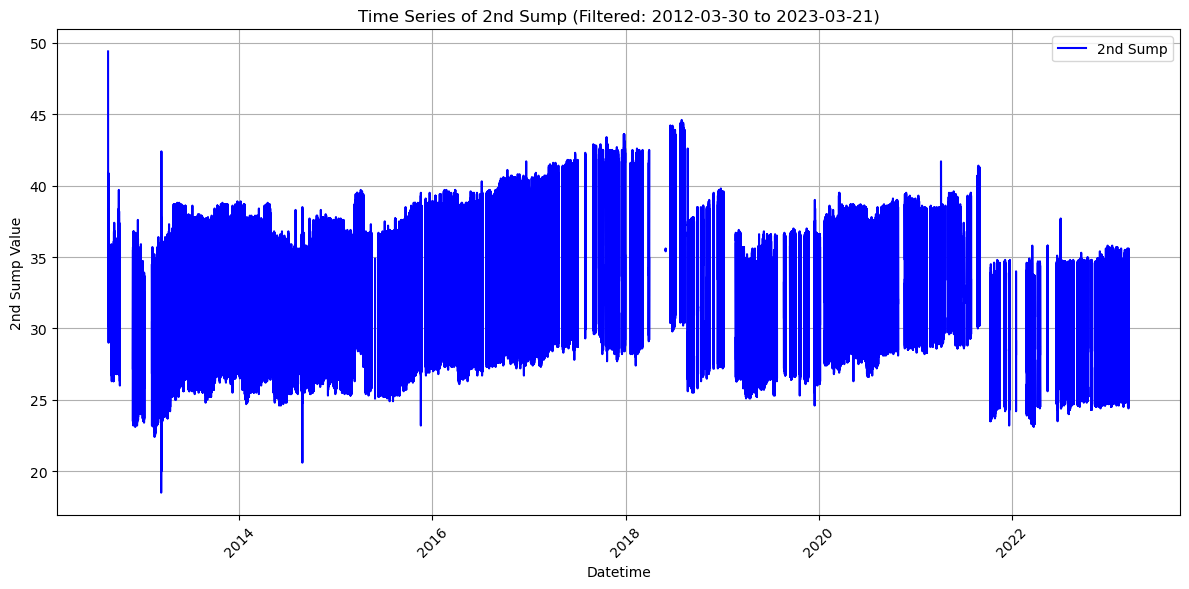

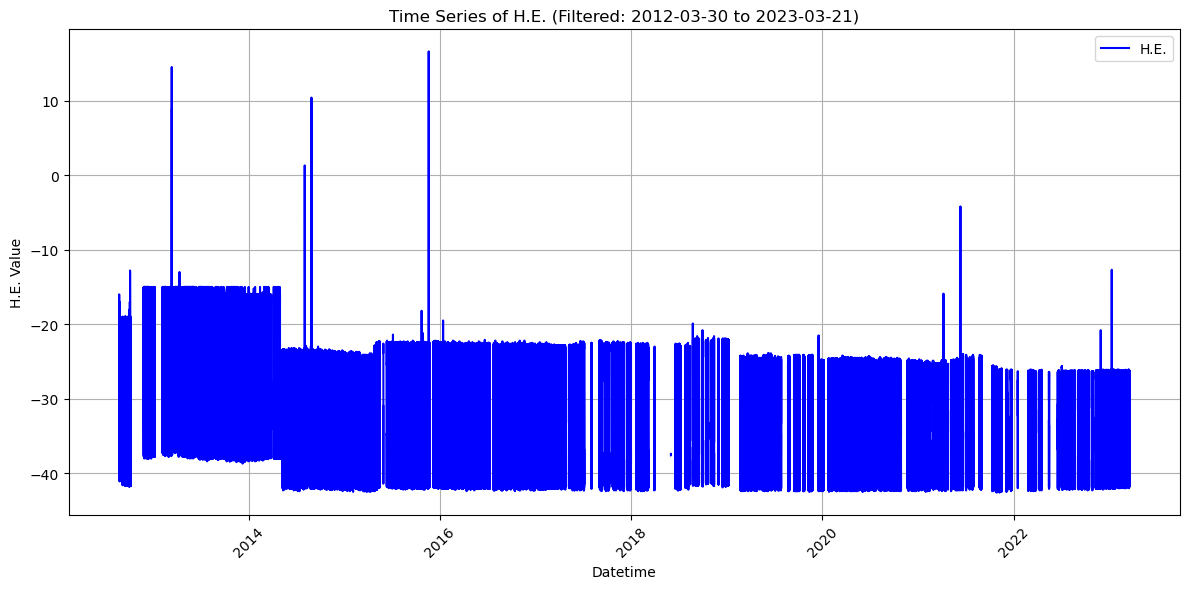

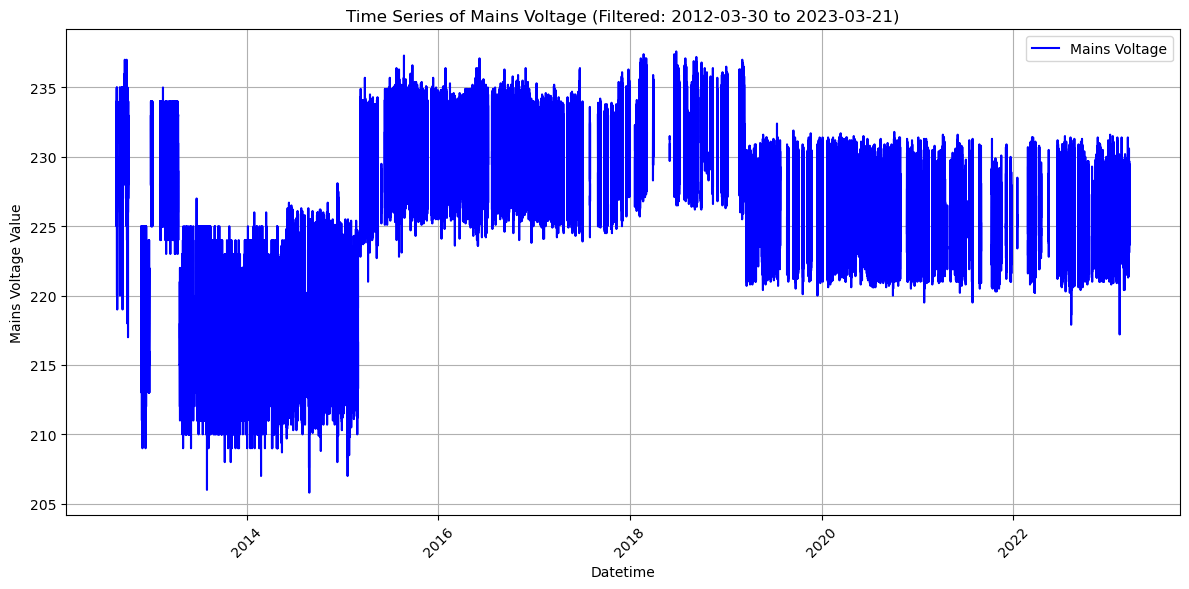

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
start_date = '2012-03-30'
end_date = '2023-03-21'

# Read the cleaned Parquet file into a DataFrame
df = pd.read_parquet(path + 'cleaned_data_' + str(Freezer_number) + '.parquet')

# Convert 'Datetime' to datetime type if it's not already
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set 'Datetime' as the index for easier plotting
df.set_index('Datetime', inplace=True)

# Filter the DataFrame to the specified date range
df_filtered = df.loc[start_date:end_date]

# Select only numeric columns for plotting
numeric_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns

# Calculate time differences between consecutive rows
time_diffs = df_filtered.index.to_series().diff().dt.total_seconds()

# Define a threshold (e.g., 2x the median difference) to detect large gaps
gap_threshold = 2 * time_diffs.median()

# Insert NaNs where gaps are detected
df_filtered.loc[time_diffs > gap_threshold, numeric_columns] = np.nan

# Plot each numeric column separately
for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df_filtered.index, df_filtered[col], label=col, color='blue')
    
    plt.title(f"Time Series of {col} (Filtered: {start_date} to {end_date})")
    plt.xlabel("Datetime")
    plt.ylabel(f"{col} Value")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()

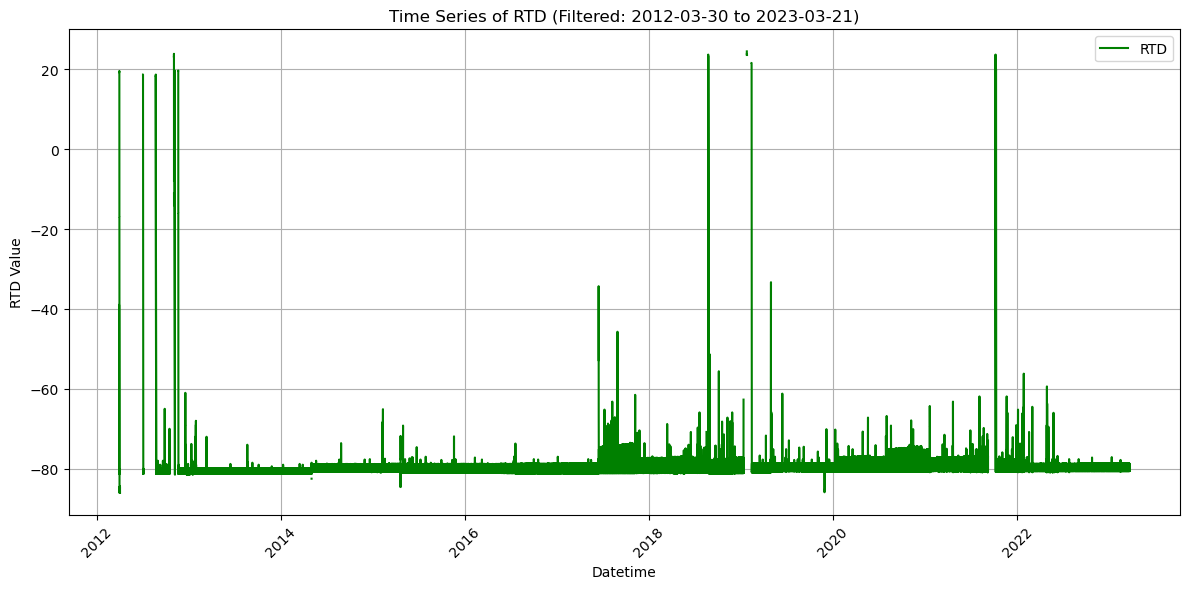

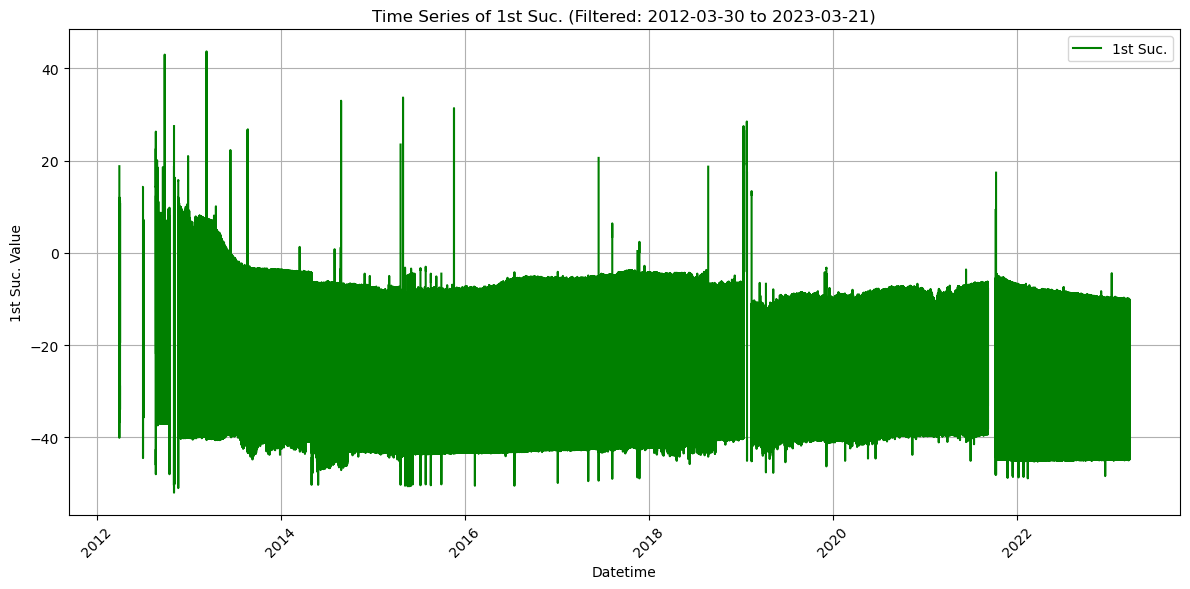

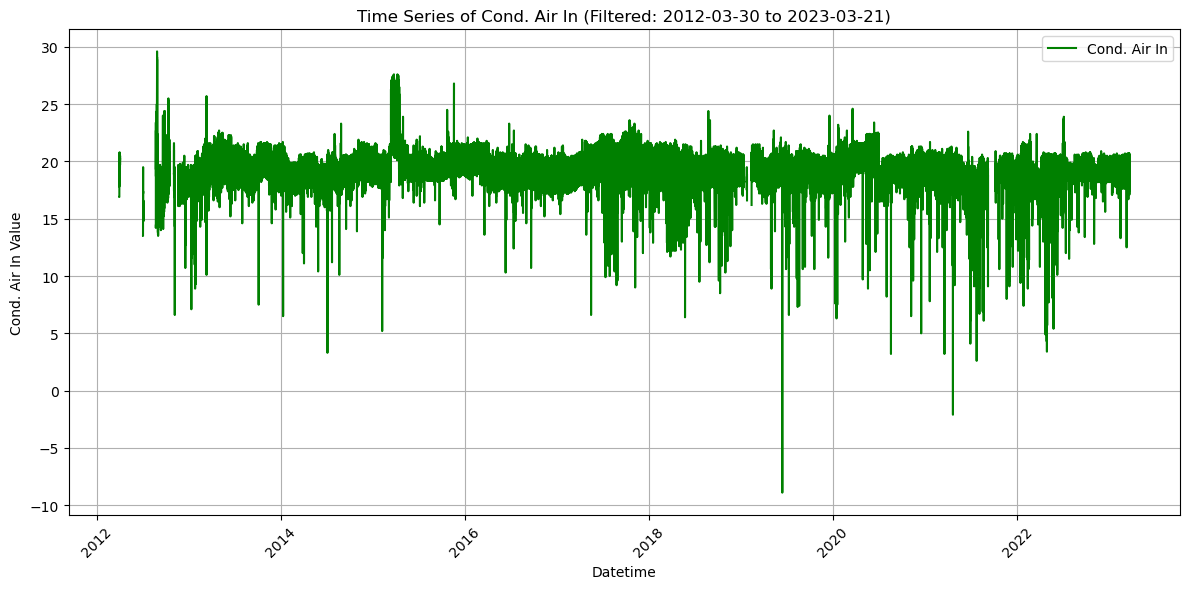

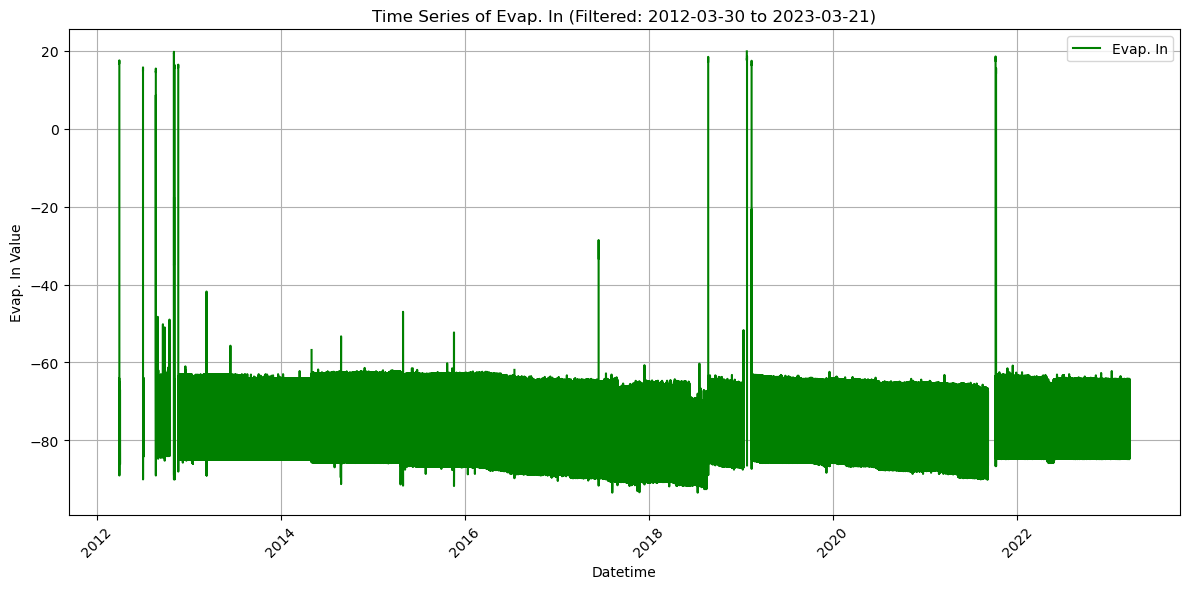

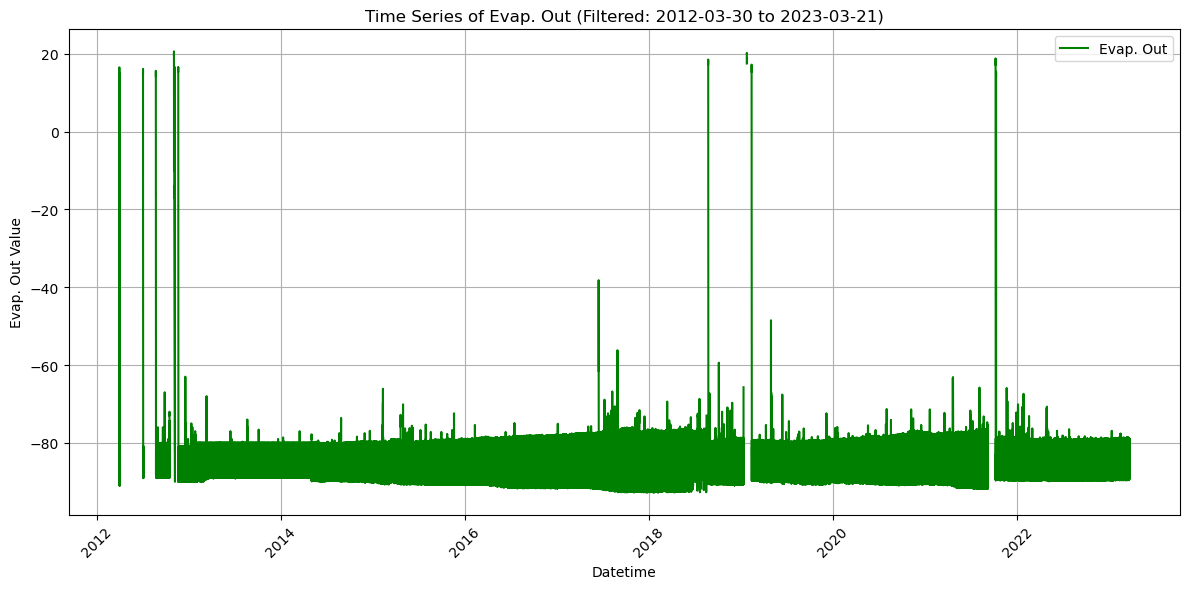

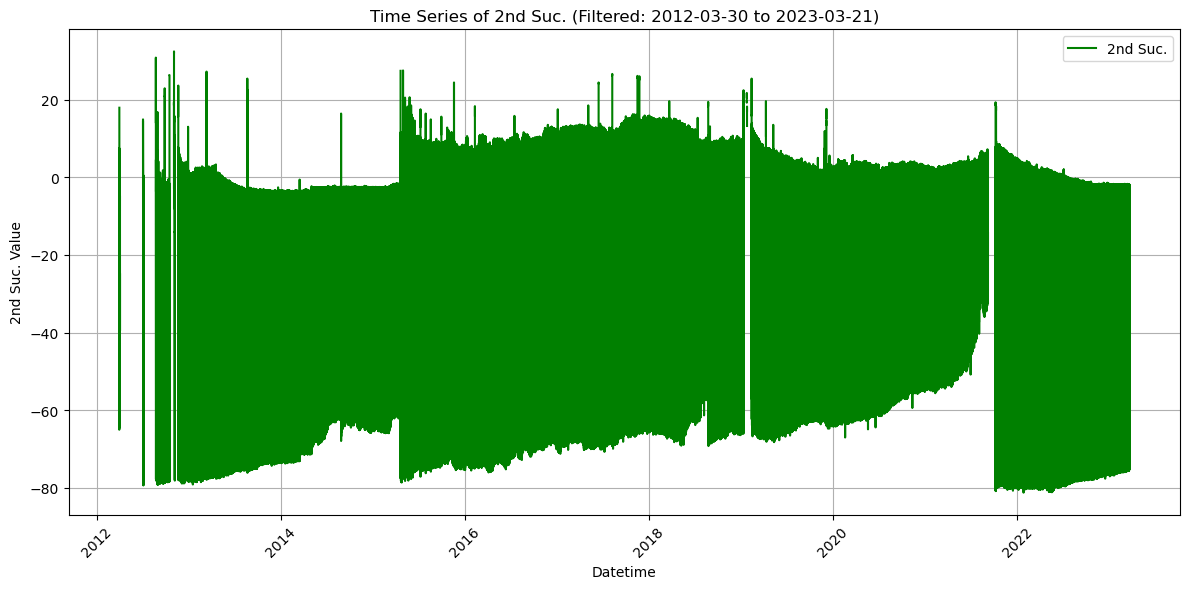

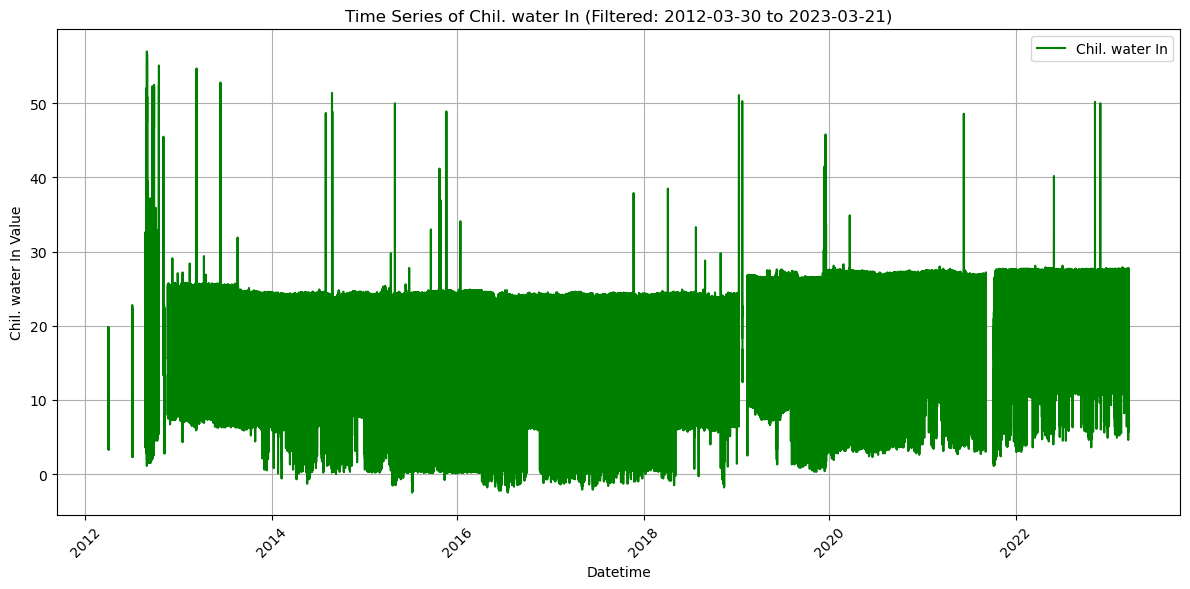

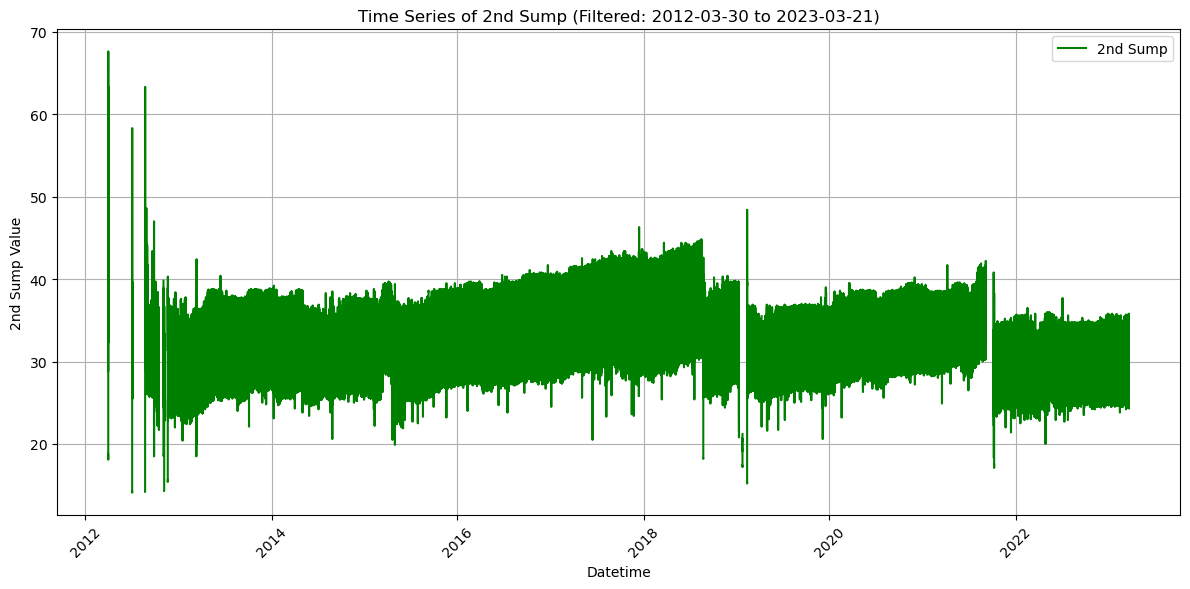

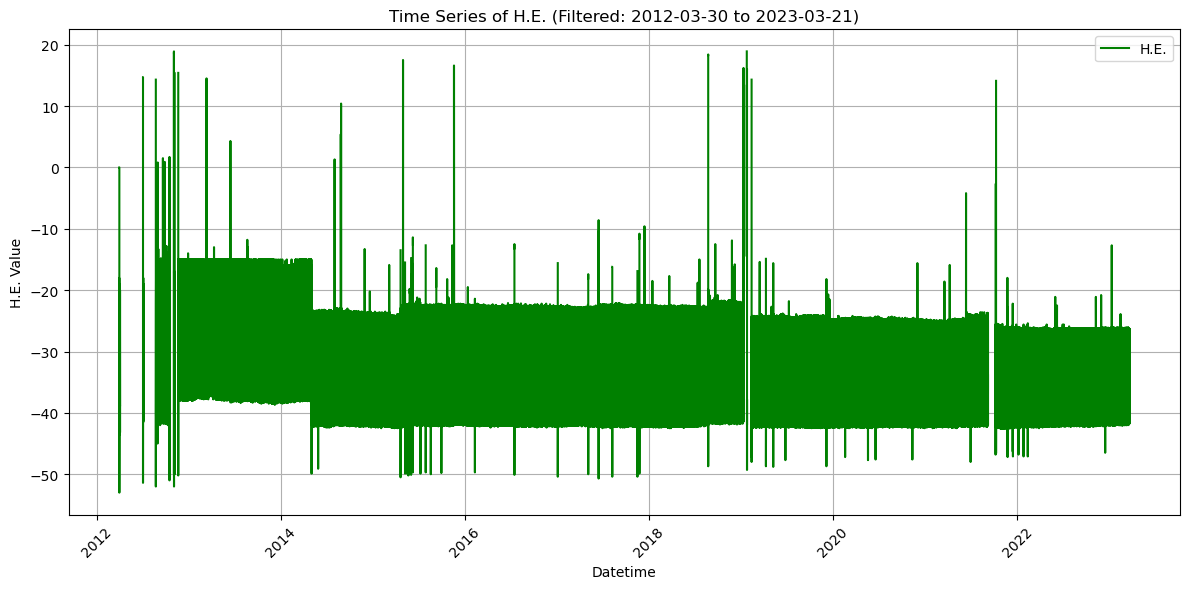

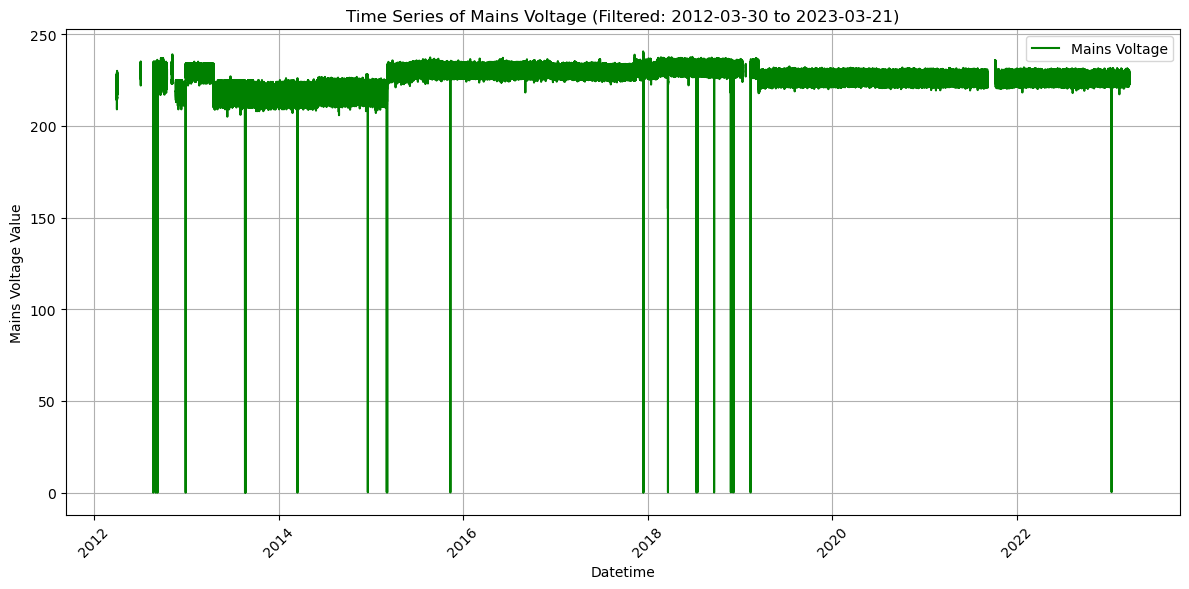

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
start_date = '2012-03-30'
end_date = '2023-03-21'

# Read the cleaned Parquet file into a DataFrame
df = pd.read_parquet(path + str(Freezer_number) + '_temp.parquet')

# Convert 'Datetime' to datetime type if it's not already
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set 'Datetime' as the index for easier plotting
df.set_index('Datetime', inplace=True)

# Filter the DataFrame to the specified date range
df_filtered = df.loc[start_date:end_date]

# Select only numeric columns for plotting
numeric_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns

# Calculate time differences between consecutive rows
time_diffs = df_filtered.index.to_series().diff().dt.total_seconds()

# Define a threshold (e.g., 2x the median difference) to detect large gaps
gap_threshold = 2 * time_diffs.median()

# Insert NaNs where gaps are detected
df_filtered.loc[time_diffs > gap_threshold, numeric_columns] = np.nan

# Plot each numeric column separately
for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df_filtered.index, df_filtered[col], label=col, color='green')
    
    plt.title(f"Time Series of {col} (Filtered: {start_date} to {end_date})")
    plt.xlabel("Datetime")
    plt.ylabel(f"{col} Value")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()